In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from matplotlib.patches import ConnectionPatch
from scipy.signal import savgol_filter

In [2]:
# overall style
# set background color
sns.set_style("whitegrid")
# set color palette
color="deep"
sns.set_palette(color)
sns.color_palette(color)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [3]:
pal = sns.color_palette("deep")
print(pal.as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


# GBS finetuning plots

In [7]:
# font size
plt.rc('font', **{'size': 23})
# line thickness
thickness=3
# smoothing
window_size = 41
order = 3
# dimensions
w=8
h=6

In [8]:
df = pd.read_csv('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/csv/GB-Ctrl-dataset.csv')
df[:5]

,Step,iconic-oath-48 - convai2_genderation/ppl/valid,iconic-oath-48 - convai2_genderation/ppl/valid__MIN,iconic-oath-48 - convai2_genderation/ppl/valid__MAX,iconic-oath-48 - convai2_genderation/ppl/train,iconic-oath-48 - convai2_genderation/ppl/train__MIN,iconic-oath-48 - convai2_genderation/ppl/train__MAX
0,0,NaN,NaN,NaN,20.973840,20.973840,20.973840
1,1,NaN,NaN,NaN,18.322601,18.322601,18.322601
2,2,NaN,NaN,NaN,18.147467,18.147467,18.147467
3,3,NaN,NaN,NaN,19.240474,19.240474,19.240474
4,4,NaN,NaN,NaN,16.603038,16.603038,16.603038


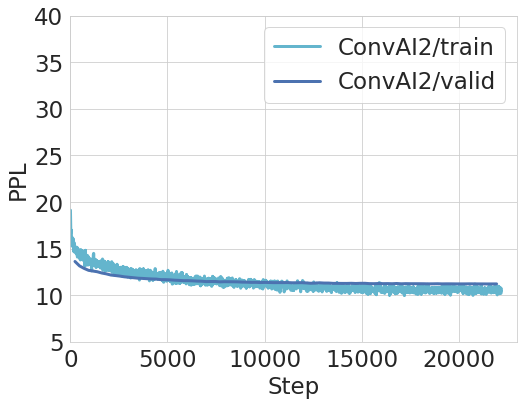

In [10]:
f, ax = plt.subplots(figsize=(w, h))

# axis limits
top = 40
bottom = 5
left = 0
plt.ylim(bottom, top)
plt.xlim(left, 23000)

# label
plt.ylabel('PPL')
plt.xlabel('Step')

# plot
# convai2 train
y=df['iconic-oath-48 - convai2_genderation/ppl/train']
yhat = savgol_filter(y, window_size, order)
sns.lineplot(data=df, x='Step', y=yhat, label='ConvAI2/train',
              linewidth=thickness, color='C9')
# convai2 valid
sns.lineplot(data=df, x='Step', y='iconic-oath-48 - convai2_genderation/ppl/valid', label='ConvAI2/valid',
              linewidth=thickness, color='C0')

plt.savefig('seaborn_plots/lineplots/GB-Ctrl-dataset', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

In [11]:
df = pd.read_csv('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/csv/GBS-Ctrl-dataset.csv')
df[:5]

,Step,pious-hill-38 - stereoset_token/ppl/valid,pious-hill-38 - stereoset_token/ppl/valid__MIN,pious-hill-38 - stereoset_token/ppl/valid__MAX,pious-hill-38 - stereoset_token/ppl/train,pious-hill-38 - stereoset_token/ppl/train__MIN,pious-hill-38 - stereoset_token/ppl/train__MAX,pious-hill-38 - convai2_token/ppl/valid,pious-hill-38 - convai2_token/ppl/valid__MIN,pious-hill-38 - convai2_token/ppl/valid__MAX,pious-hill-38 - convai2_token/ppl/train,pious-hill-38 - convai2_token/ppl/train__MIN,pious-hill-38 - convai2_token/ppl/train__MAX
0,0,NaN,NaN,NaN,51.403043,51.403043,51.403043,NaN,NaN,NaN,20.477985,20.477985,20.477985
1,1,NaN,NaN,NaN,50.034204,50.034204,50.034204,NaN,NaN,NaN,19.821109,19.821109,19.821109
2,2,NaN,NaN,NaN,38.562774,38.562774,38.562774,NaN,NaN,NaN,20.299369,20.299369,20.299369
3,3,NaN,NaN,NaN,51.411223,51.411223,51.411223,NaN,NaN,NaN,21.845847,21.845847,21.845847
4,4,NaN,NaN,NaN,38.283444,38.283444,38.283444,NaN,NaN,NaN,19.069255,19.069255,19.069255


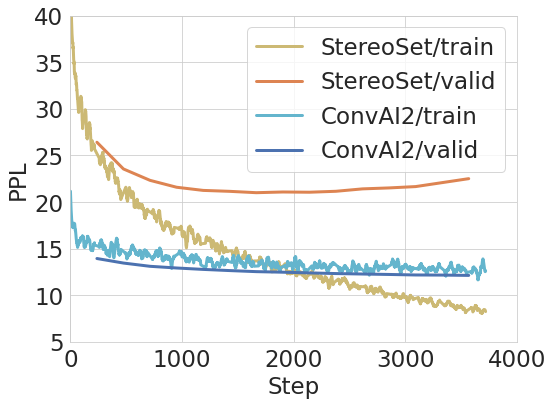

In [12]:
f, ax = plt.subplots(figsize=(w, h))

# axis limits
top = 40
bottom = 5
left = 0
plt.ylim(bottom, top)
plt.xlim(left, 4000)

# label
plt.ylabel('PPL')
plt.xlabel('Step')

# plot
# stereoset train
y=df['pious-hill-38 - stereoset_token/ppl/train']
yhat = savgol_filter(y, window_size, order)
sns.lineplot(data=df, x='Step', y=yhat, label='StereoSet/train',
              linewidth=thickness, color='C8')
# stereoset valid
sns.lineplot(data=df, x='Step', y='pious-hill-38 - stereoset_token/ppl/valid', label='StereoSet/valid',
              linewidth=thickness, color='C1')
# convai2 train
y=df['pious-hill-38 - convai2_token/ppl/train']
yhat = savgol_filter(y, window_size, order)
sns.lineplot(data=df, x='Step', y=yhat, label='ConvAI2/train',
              linewidth=thickness, color='C9')
# convai2 valid
sns.lineplot(data=df, x='Step', y='pious-hill-38 - convai2_token/ppl/valid', label='ConvAI2/valid',
              linewidth=thickness, color='C0')

plt.savefig('seaborn_plots/lineplots/GBS-Ctrl-dataset', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

# GBS-Ctrl loss and ppl

In [13]:
df = pd.read_csv('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/csv/GBS-Ctrl-loss.csv')
df[:5]

,Step,pious-hill-38 - loss/valid,pious-hill-38 - loss/valid__MIN,pious-hill-38 - loss/valid__MAX,pious-hill-38 - loss/train,pious-hill-38 - loss/train__MIN,pious-hill-38 - loss/train__MAX
0,0,NaN,NaN,NaN,3.237059,3.237059,3.237059
1,1,NaN,NaN,NaN,3.259100,3.259100,3.259100
2,2,NaN,NaN,NaN,3.262970,3.262970,3.262970
3,3,NaN,NaN,NaN,3.189603,3.189603,3.189603
4,4,NaN,NaN,NaN,3.172761,3.172761,3.172761


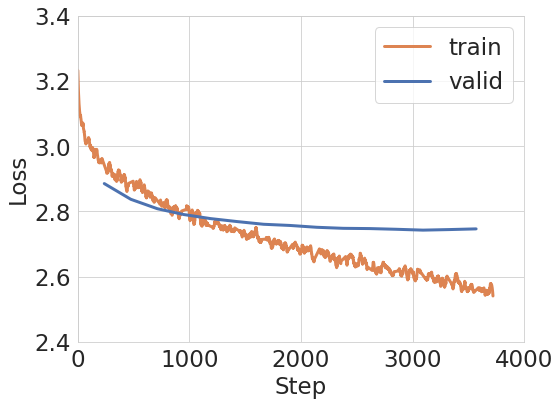

In [14]:
f, ax = plt.subplots(figsize=(w, h))

# axis limits
top = 3.4
bottom = 2.4
left = 0
plt.ylim(bottom, top)
plt.xlim(left, 4000)

# label
plt.ylabel('Loss')
plt.xlabel('Step')

# plot
# train
y=df['pious-hill-38 - loss/train']
yhat = savgol_filter(y, window_size, order)
sns.lineplot(data=df, x='Step', y=yhat, label='train',
              linewidth=thickness, color='C1')
# valid
sns.lineplot(data=df, x='Step', y='pious-hill-38 - loss/valid', label='valid',
              linewidth=thickness, color='C0')

plt.savefig('seaborn_plots/lineplots/GBS-Ctrl-loss', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

In [15]:
df = pd.read_csv('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/csv/GBS-Ctrl-ppl.csv')
df[:5]

,Step,pious-hill-38 - ppl/valid,pious-hill-38 - ppl/valid__MIN,pious-hill-38 - ppl/valid__MAX,pious-hill-38 - ppl/train,pious-hill-38 - ppl/train__MIN,pious-hill-38 - ppl/train__MAX
0,0,NaN,NaN,NaN,28.112245,28.112245,28.112245
1,1,NaN,NaN,NaN,28.189510,28.189510,28.189510
2,2,NaN,NaN,NaN,28.048422,28.048422,28.048422
3,3,NaN,NaN,NaN,26.723021,26.723021,26.723021
4,4,NaN,NaN,NaN,25.147767,25.147767,25.147767


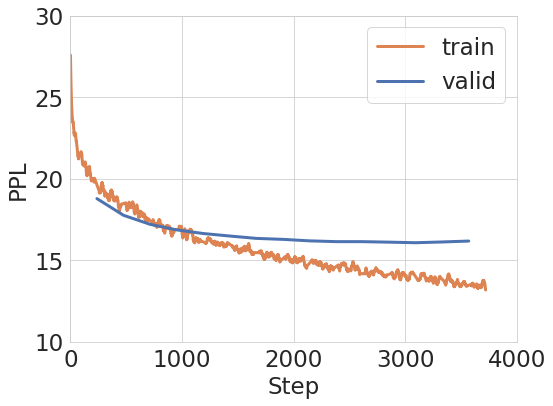

In [16]:
f, ax = plt.subplots(figsize=(w, h))

# axis limits
top = 30
bottom = 10
left = 0
plt.ylim(bottom, top)
plt.xlim(left, 4000)

# label
plt.ylabel('PPL')
plt.xlabel('Step')

# plot
# convai2 train
y=df['pious-hill-38 - ppl/train']
yhat = savgol_filter(y, window_size, order)
sns.lineplot(data=df, x='Step', y=yhat, label='train',
              linewidth=thickness, color='C1')
# convai2 valid
sns.lineplot(data=df, x='Step', y='pious-hill-38 - ppl/valid', label='valid',
              linewidth=thickness, color='C0')

plt.savefig('seaborn_plots/lineplots/GBS-Ctrl-ppl', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

# GB-Ctrl loss and ppl

In [17]:
df = pd.read_csv('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/csv/GB-Ctrl-loss.csv')
df[:5]

,Step,iconic-oath-48 - loss/valid,iconic-oath-48 - loss/valid__MIN,iconic-oath-48 - loss/valid__MAX,iconic-oath-48 - loss/train,iconic-oath-48 - loss/train__MIN,iconic-oath-48 - loss/train__MAX
0,0,NaN,NaN,NaN,3.037464,3.037464,3.037464
1,1,NaN,NaN,NaN,2.995241,2.995241,2.995241
2,2,NaN,NaN,NaN,2.971956,2.971956,2.971956
3,3,NaN,NaN,NaN,3.030851,3.030851,3.030851
4,4,NaN,NaN,NaN,2.917501,2.917501,2.917501


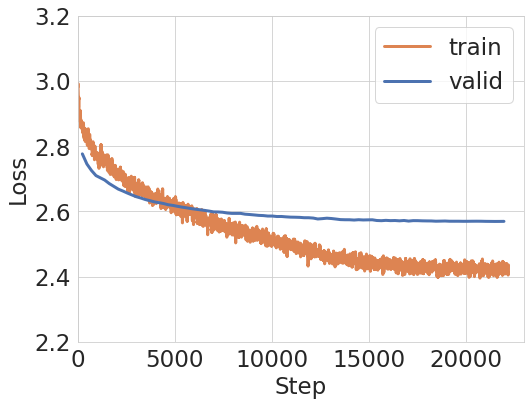

In [18]:
f, ax = plt.subplots(figsize=(w, h))

# axis limits
top = 3.2
bottom = 2.2
left = 0
plt.ylim(bottom, top)
plt.xlim(left, 23000)

# label
plt.ylabel('Loss')
plt.xlabel('Step')

# plot
# train
y=df['iconic-oath-48 - loss/train']
yhat = savgol_filter(y, window_size, order)
sns.lineplot(data=df, x='Step', y=yhat, label='train',
              linewidth=thickness, color='C1')
# valid
sns.lineplot(data=df, x='Step', y='iconic-oath-48 - loss/valid', label='valid',
              linewidth=thickness, color='C0')

plt.savefig('seaborn_plots/lineplots/GB-Ctrl-loss', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

In [20]:
df = pd.read_csv('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/csv/GB-Ctrl-ppl.csv')
df[:5]

,Step,iconic-oath-48 - ppl/valid,iconic-oath-48 - ppl/valid__MIN,iconic-oath-48 - ppl/valid__MAX,iconic-oath-48 - ppl/train,iconic-oath-48 - ppl/train__MIN,iconic-oath-48 - ppl/train__MAX
0,0,NaN,NaN,NaN,21.678184,21.678184,21.678184
1,1,NaN,NaN,NaN,20.293197,20.293197,20.293197
2,2,NaN,NaN,NaN,19.969588,19.969588,19.969588
3,3,NaN,NaN,NaN,21.487119,21.487119,21.487119
4,4,NaN,NaN,NaN,19.331457,19.331457,19.331457


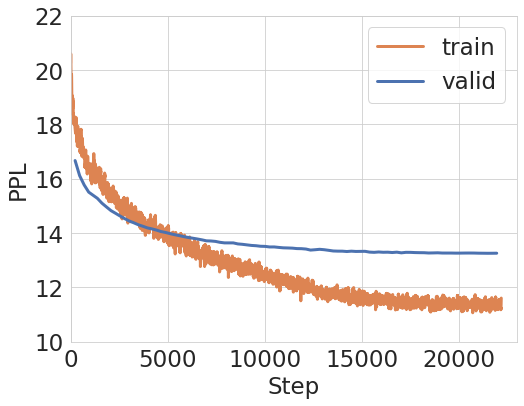

In [21]:
f, ax = plt.subplots(figsize=(w, h))

# axis limits
top = 22
bottom = 10
left = 0
plt.ylim(bottom, top)
plt.xlim(left, 23000)

# label
plt.ylabel('PPL')
plt.xlabel('Step')

# plot
# train
y=df['iconic-oath-48 - ppl/train']
yhat = savgol_filter(y, window_size, order)
sns.lineplot(data=df, x='Step', y=yhat, label='train',
              linewidth=thickness, color='C1')
# valid
sns.lineplot(data=df, x='Step', y='iconic-oath-48 - ppl/valid', label='valid',
              linewidth=thickness, color='C0')

plt.savefig('seaborn_plots/lineplots/GB-Ctrl-ppl', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

# RoBERTa MC accuracy

In [22]:
df = pd.read_csv('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/csv/roberta-mc-acc.csv')
df[:5]

,Step,lunar-silence-6 - eval_acc,lunar-silence-6 - eval_acc__MIN,lunar-silence-6 - eval_acc__MAX
0,518,0.699990,0.699990,0.699990
1,1039,0.735329,0.735329,0.735329
2,1560,0.741228,0.741228,0.741228
3,2081,0.751425,0.751425,0.751425
4,2602,0.771519,0.771519,0.771519


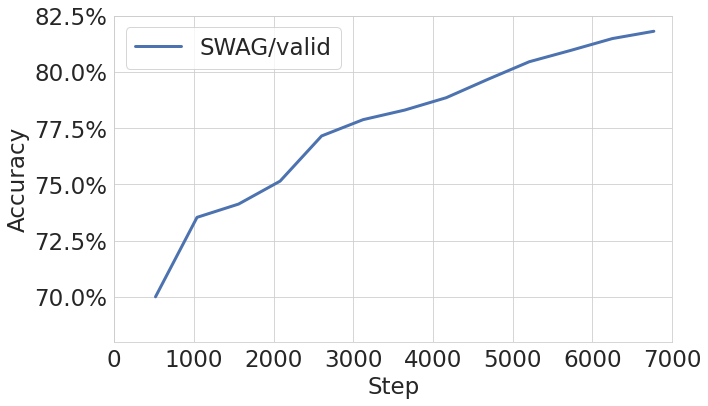

In [141]:
f, ax = plt.subplots(figsize=(w+2, h))

# axis limits
top = 0.825
bottom = 0.68
plt.ylim(bottom, top)
plt.xlim(0,7000)

# label
plt.ylabel('Accuracy')
plt.xlabel('Step')

# plot
# valid
sns.lineplot(data=df, x='Step', y='lunar-silence-6 - eval_acc', label='SWAG/valid',
              linewidth=thickness, color='C0')

# percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.savefig('seaborn_plots/lineplots/roberta-mc-acc', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

## Delta bias score

In [ ]:
# Figure dimensions
w=13
h=8

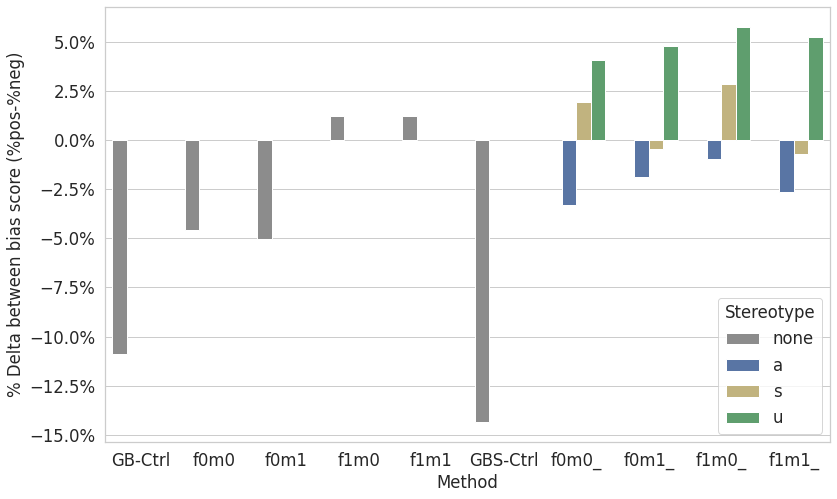

In [88]:
data = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/bias_score2.xlsx')

my_palette=['C7','C0','C8','C2']
f, ax = plt.subplots(figsize=(w, h))
sns.barplot(x = "Method", y = "delta bias score", hue = "Stereotype", palette=my_palette, data = data)

size=16.5
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel("Method", fontsize=size)
plt.ylabel("% Delta between bias score (%pos-%neg)", fontsize=size)
legend = plt.legend(loc='lower right', title='Stereotype', fontsize=size)
plt.setp(legend.get_title(),fontsize=size)
plt.tick_params(labelsize=size)

plt.savefig('seaborn_plots/delta_bias', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')
plt.show()

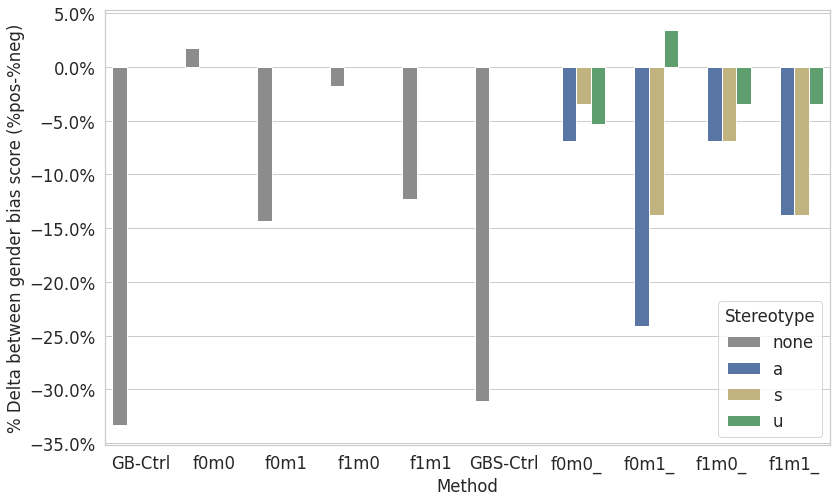

In [89]:
data = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/bias_score2.xlsx')

my_palette=['C7','C0','C8','C2']
f, ax = plt.subplots(figsize=(w, h))
sns.barplot(x = "Method", y = "delta gender bias score", hue = "Stereotype", palette=my_palette, data = data)

size=16.5
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xlabel("Method", fontsize=size)
plt.ylabel("% Delta between gender bias score (%pos-%neg)", fontsize=size)
legend = plt.legend(loc='lower right', title='Stereotype', fontsize=size)
plt.setp(legend.get_title(),fontsize=size)
plt.tick_params(labelsize=size)

plt.savefig('seaborn_plots/delta_gender_bias', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')
plt.show()

# GBS-Ctrl ConvAI2

In [16]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/GBS-Ctrl-eval.xlsx', sheet_name='convai2')
# wide to long
data = pd.melt(df, id_vars=['Row #','Method','Word List','Classifier','PPL'])

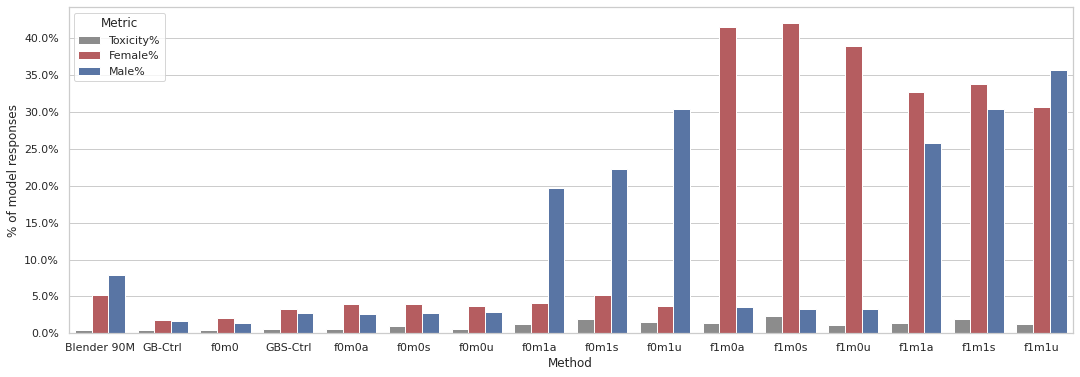

In [119]:
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x="Method", y="value", hue="variable", palette=['C7','C3','C0'], data=data, orient='v')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='upper left', title='Metric')
plt.ylabel("% of model responses")
plt.savefig('seaborn_plots/GBS-Ctrl-convai2', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')
plt.show()

In [ ]:
# Figure dimensions for GBS-Ctrl bar charts
w=12
h=12
# Font size
size=16.5

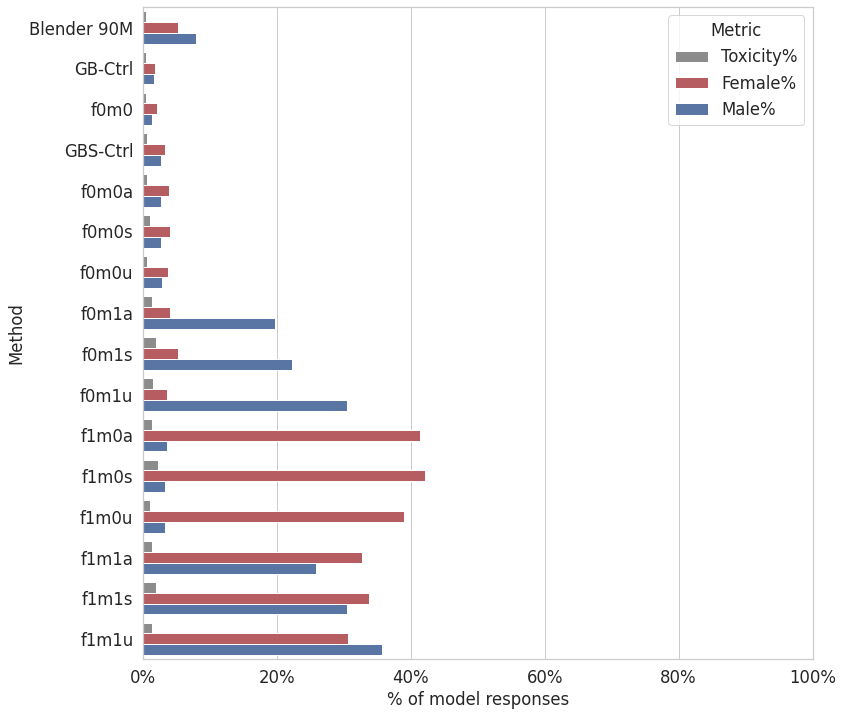

In [85]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/GBS-Ctrl-eval.xlsx', sheet_name='convai2')
# wide to long
data = pd.melt(df, id_vars=['Row #','Method','Word List','Classifier','PPL'])


f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(y="Method", x="value", hue="variable", palette=['C7','C3','C0'], data=data, orient='h')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
legend = plt.legend(loc='upper right', title='Metric', fontsize=size)
plt.setp(legend.get_title(),fontsize=size)
plt.xlabel("% of model responses", fontsize=size)
plt.ylabel("Method", fontsize=size)
plt.tick_params(labelsize=size)
ax.set_xlim([0,1])

plt.savefig('seaborn_plots/GBS-Ctrl-convai2-h', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')
plt.show()

# GBS-Ctrl StereoSet

In [18]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/GBS-Ctrl-eval.xlsx', sheet_name='stereoset-compare')
data = df.melt(id_vars=['Row #','Method','Word List','Classifier','PPL'])

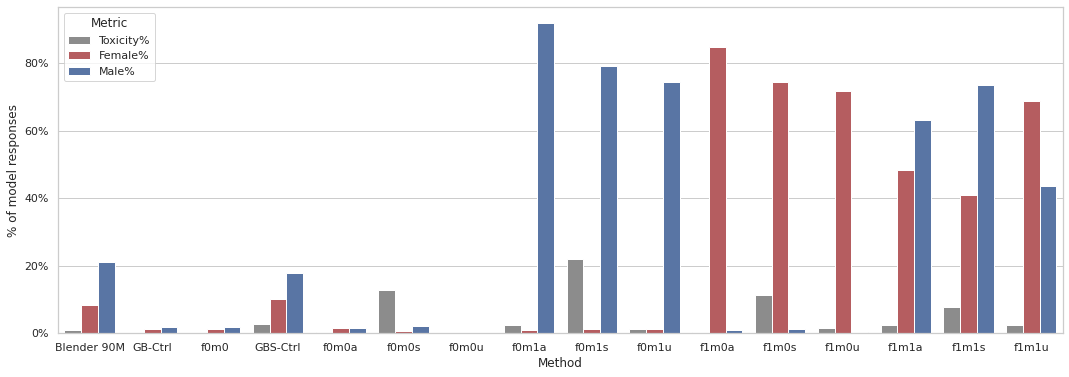

In [111]:
f, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x="Method", y="value", hue="variable", palette=['C7','C3','C0'], data=data)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='upper left', title='Metric')
plt.ylabel("% of model responses")
plt.savefig('seaborn_plots/GBS-Ctrl-stereoset', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')
plt.show()

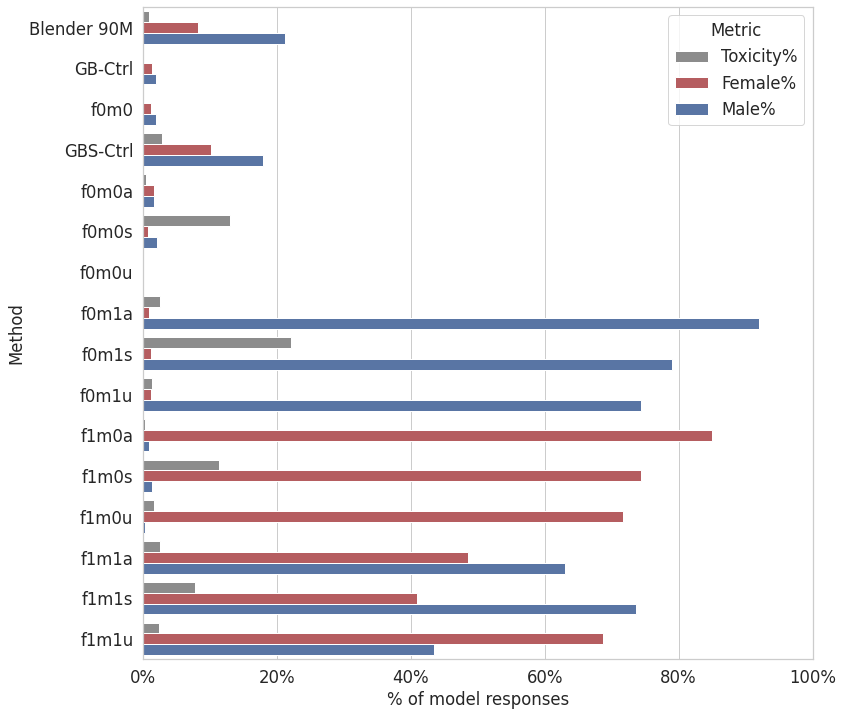

In [86]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/GBS-Ctrl-eval.xlsx', sheet_name='stereoset-compare')
data = df.melt(id_vars=['Row #','Method','Word List','Classifier','PPL'])

f, ax = plt.subplots(figsize=(w, h))
sns.barplot(y="Method", x="value", hue="variable", palette=['C7','C3','C0'], data=data, orient='h')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
legend = plt.legend(loc='upper right', title='Metric', fontsize=size)
plt.setp(legend.get_title(),fontsize=size)
plt.xlabel("% of model responses", fontsize=size)
plt.ylabel("Method", fontsize=size)
plt.tick_params(labelsize=size)
ax.set_xlim([0,1])

plt.savefig('seaborn_plots/GBS-Ctrl-stereoset-h', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')
plt.show()

# GB-Ctrl ConvAI2

In [13]:
# Figure dimensions
w=12
h=8
# Font size
size=16.5

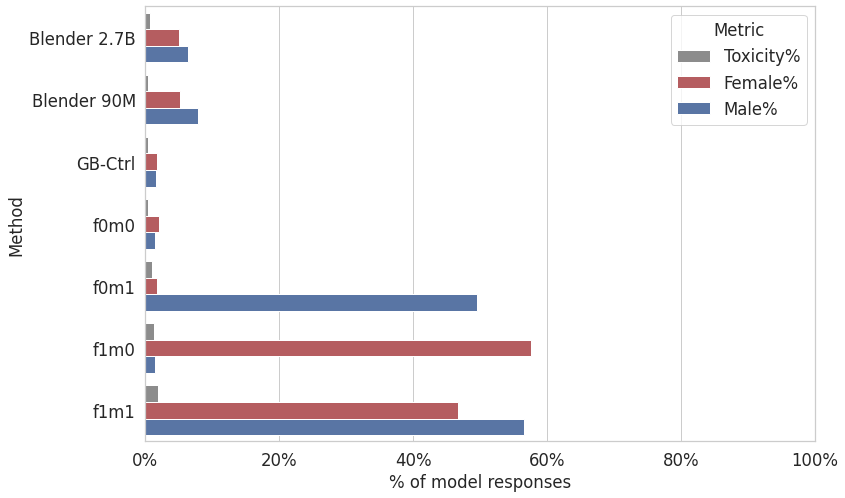

In [87]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/GBS-Ctrl-eval.xlsx', sheet_name='GB-Ctrl')
data = df.melt(id_vars=['Row #','Method','Word List','Classifier','PPL'])

f, ax = plt.subplots(figsize=(w, h))
sns.barplot(y="Method", x="value", hue="variable", palette=['C7','C3','C0'], data=data, orient='h')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
legend = plt.legend(loc='upper right', title='Metric', fontsize=size)
plt.setp(legend.get_title(),fontsize=size)
plt.xlabel("% of model responses", fontsize=size)
plt.ylabel("Method", fontsize=size)
plt.tick_params(labelsize=size)
ax.set_xlim([0,1])

plt.savefig('seaborn_plots/GB-Ctrl-convai2-h', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')
plt.show()

# Confusion Matrix

In [ ]:
# Figure dimensions for GBS-Ctrl
w=10
h=8
# Font size
size=18
# Font scale (legend)
scale=1.6

# GBS-Ctrl random incorrect token

## ConvAI2

In [60]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GBS-convai2-random')
df = df.set_index('Unnamed: 0')
df

,f0m0a,f0m0s,f0m0u,f0m1a,f0m1s,f0m1u,f1m0a,f1m0s,f1m0u,f1m1a,f1m1s,f1m1u
Unnamed: 0,,,,,,,,,,,,
f0m0a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f0m0s,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f0m0u,0.053519,0.041303,0.528796,0.032577,0.036067,0.047120,0.043630,0.048866,0.037813,0.043630,0.044793,0.041885
f0m1a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f0m1s,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f0m1u,0.070513,0.051282,0.044872,0.044872,0.038462,0.538462,0.019231,0.044872,0.032051,0.032051,0.051282,0.032051
f1m0a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f1m0s,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
f1m0u,0.035398,0.123894,0.044248,0.044248,0.053097,0.035398,0.044248,0.035398,0.486726,0.035398,0.026549,0.035398


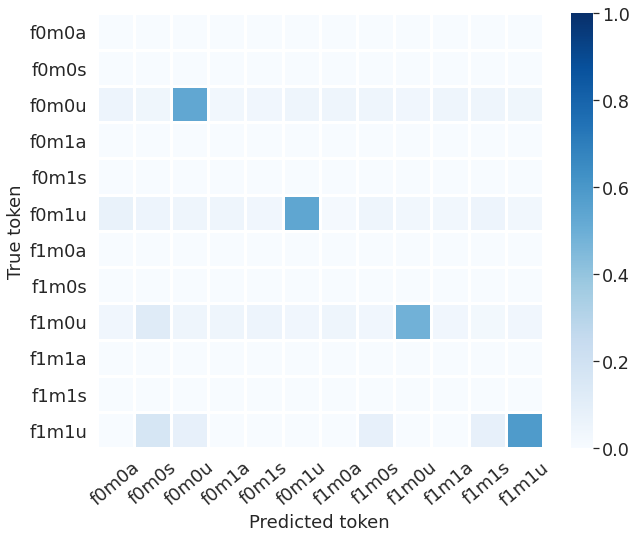

In [61]:
f, ax = plt.subplots(figsize=(w, h))

sns.set(font_scale=scale)
sns.heatmap(df, vmax=1, cmap='Blues', linewidths=3, linecolor='white')

plt.xlabel("Predicted token", fontsize=size)
plt.ylabel("True token", fontsize=size)
plt.tick_params(labelsize=size)
plt.xticks(rotation=40)

plt.savefig('seaborn_plots/GBS-Ctrl-random-convai2', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

## StereoSet

In [58]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GBS-stereoset-random')
df = df.set_index('Unnamed: 0')
df

,f0m0a,f0m0s,f0m0u,f0m1a,f0m1s,f0m1u,f1m0a,f1m0s,f1m0u,f1m1a,f1m1s,f1m1u
Unnamed: 0,,,,,,,,,,,,
f0m0a,0.525253,0.045455,0.040404,0.020202,0.035354,0.075758,0.035354,0.045455,0.055556,0.035354,0.055556,0.030303
f0m0s,0.064677,0.517413,0.039801,0.029851,0.034826,0.024876,0.034826,0.054726,0.059701,0.034826,0.059701,0.044776
f0m0u,0.058824,0.035806,0.480818,0.051151,0.051151,0.030691,0.033248,0.040921,0.051151,0.040921,0.071611,0.053708
f0m1a,0.031496,0.039370,0.047244,0.519685,0.047244,0.047244,0.070866,0.015748,0.039370,0.039370,0.047244,0.055118
f0m1s,0.041096,0.068493,0.034247,0.034247,0.500000,0.034247,0.034247,0.075342,0.041096,0.034247,0.054795,0.047945
f0m1u,0.125000,0.000000,0.062500,0.000000,0.062500,0.437500,0.000000,0.062500,0.000000,0.187500,0.062500,0.000000
f1m0a,0.021978,0.032967,0.065934,0.054945,0.032967,0.054945,0.472527,0.054945,0.065934,0.032967,0.065934,0.043956
f1m0s,0.015385,0.123077,0.076923,0.046154,0.030769,0.046154,0.015385,0.446154,0.015385,0.015385,0.092308,0.076923
f1m0u,0.000000,0.062500,0.000000,0.000000,0.062500,0.062500,0.062500,0.125000,0.562500,0.000000,0.062500,0.000000


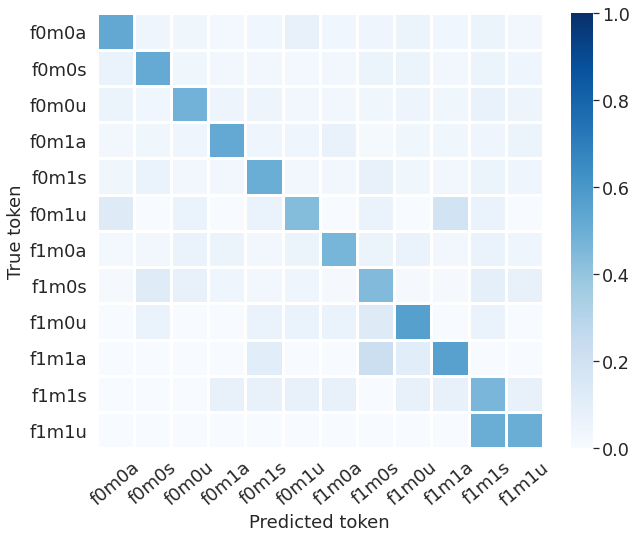

In [59]:
f, ax = plt.subplots(figsize=(w, h))

sns.set(font_scale=scale)
sns.heatmap(df, vmax=1, cmap='Blues', linewidths=3, linecolor='white')

plt.xlabel("Predicted token", fontsize=size)
plt.ylabel("True token", fontsize=size)
plt.tick_params(labelsize=size)
plt.xticks(rotation=40)

plt.savefig('seaborn_plots/GBS-Ctrl-random-stereoset', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

# GBS-Ctrl fixed f0m0u

## ConvAI2

In [55]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GBS-convai2-f0m0u')
df = df.set_index('Unnamed: 0')
df

,f0m0a,f0m0s,f0m0u,f0m1a,f0m1s,f0m1u,f1m0a,f1m0s,f1m0u,f1m1a,f1m1s,f1m1u
Unnamed: 0,,,,,,,,,,,,
f0m0a,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0.000000
f0m0s,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0.000000
f0m0u,0,0,1.000000,0,0,0.000000,0,0,0,0,0,0.000000
f0m1a,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0.000000
f0m1s,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0.000000
f0m1u,0,0,0.512821,0,0,0.487179,0,0,0,0,0,0.000000
f1m0a,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0.000000
f1m0s,0,0,0.000000,0,0,0.000000,0,0,0,0,0,0.000000
f1m0u,0,0,0.000000,0,0,0.000000,0,0,1,0,0,0.000000


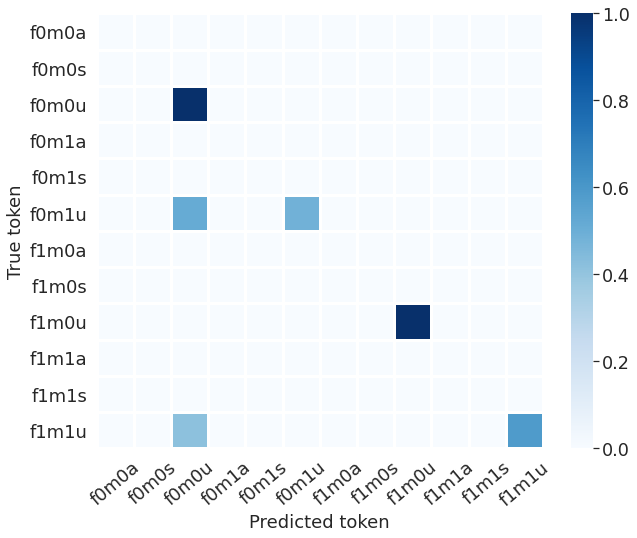

In [57]:
f, ax = plt.subplots(figsize=(w, h))

sns.set(font_scale=scale)
sns.heatmap(df, vmax=1, cmap='Blues', linewidths=3, linecolor='white')

plt.xlabel("Predicted token", fontsize=size)
plt.ylabel("True token", fontsize=size)
plt.tick_params(labelsize=size)
plt.xticks(rotation=40)

plt.savefig('seaborn_plots/GBS-Ctrl-f0m0u-convai2', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

## StereoSet

In [63]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GBS-stereoset-f0m0u')
df = df.set_index('Unnamed: 0')
df

,f0m0a,f0m0s,f0m0u,f0m1a,f0m1s,f0m1u,f1m0a,f1m0s,f1m0u,f1m1a,f1m1s,f1m1u
Unnamed: 0,,,,,,,,,,,,
f0m0a,0.505051,0.000000,0.494949,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
f0m0s,0.000000,0.532338,0.467662,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
f0m0u,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
f0m1a,0.000000,0.000000,0.574803,0.425197,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
f0m1s,0.000000,0.000000,0.554795,0.000000,0.445205,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.0
f0m1u,0.000000,0.000000,0.375000,0.000000,0.000000,0.625,0.000000,0.000000,0.000,0.000000,0.000000,0.0
f1m0a,0.000000,0.000000,0.417582,0.000000,0.000000,0.000,0.582418,0.000000,0.000,0.000000,0.000000,0.0
f1m0s,0.000000,0.000000,0.584615,0.000000,0.000000,0.000,0.000000,0.415385,0.000,0.000000,0.000000,0.0
f1m0u,0.000000,0.000000,0.375000,0.000000,0.000000,0.000,0.000000,0.000000,0.625,0.000000,0.000000,0.0


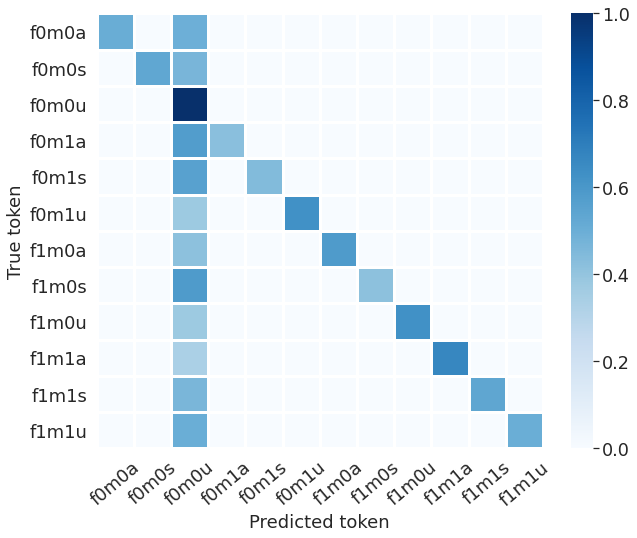

In [65]:
f, ax = plt.subplots(figsize=(w, h))

sns.set(font_scale=scale)
sns.heatmap(df, vmax=1, cmap='Blues', linewidths=3, linecolor='white')

plt.xlabel("Predicted token", fontsize=size)
plt.ylabel("True token", fontsize=size)
plt.tick_params(labelsize=size)
plt.xticks(rotation=40)

plt.savefig('seaborn_plots/GBS-Ctrl-f0m0u-stereoset', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

# GB-Ctrl random incorrect token

In [ ]:
# Figure dimensions for GBS-Ctrl
w=10
h=8
# Font size
size=34
# Font scale (legend)
scale=3

In [72]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GB-random')
df = df.set_index('Unnamed: 0')
df

,f0m0,f0m1,f1m0,f1m1
Unnamed: 0,,,,
f0m0,0.515998,0.152414,0.167539,0.164049
f0m1,0.166667,0.512821,0.147436,0.173077
f1m0,0.168142,0.168142,0.460177,0.203540
f1m1,0.083333,0.166667,0.166667,0.583333


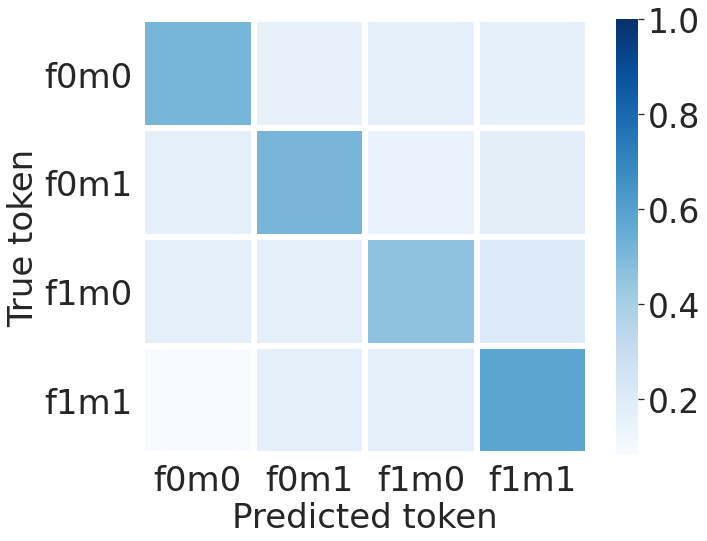

In [73]:
f, ax = plt.subplots(figsize=(w, h))

sns.set(font_scale=scale)
sns.heatmap(df, vmax=1, cmap='Blues', linewidths=6, linecolor='white')

plt.xlabel("Predicted token", fontsize=size)
plt.ylabel("True token", fontsize=size)
plt.tick_params(labelsize=size)
# plt.xticks(rotation=40)
plt.yticks(rotation=0)


plt.savefig('seaborn_plots/GB-Ctrl-random-convai2', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

# GB-Ctrl fixed f0m0

In [74]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GB-f0m0')
df = df.set_index('Unnamed: 0')
df

,f0m0,f0m1,f1m0,f1m1
Unnamed: 0,,,,
f0m0,1.000000,0.000000,0.000000,0.000000
f0m1,0.512821,0.487179,0.000000,0.000000
f1m0,0.584071,0.000000,0.415929,0.000000
f1m1,0.416667,0.000000,0.000000,0.583333


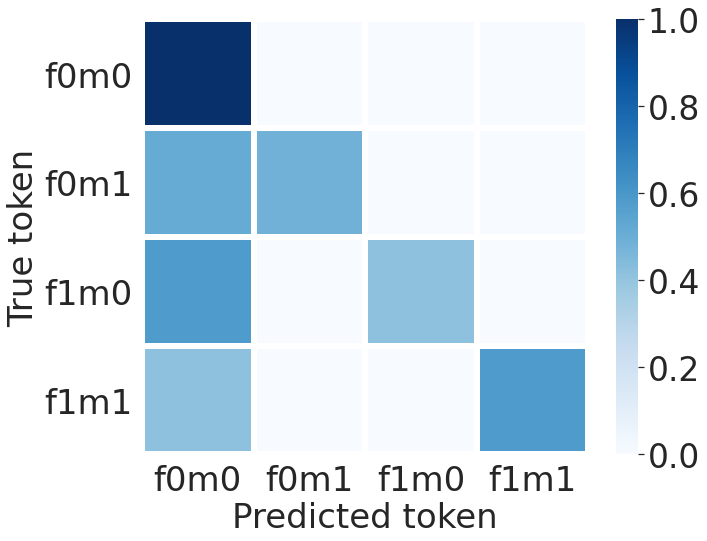

In [75]:
f, ax = plt.subplots(figsize=(w, h))

sns.set(font_scale=scale)
sns.heatmap(df, vmax=1, cmap='Blues', linewidths=6, linecolor='white')

plt.xlabel("Predicted token", fontsize=size)
plt.ylabel("True token", fontsize=size)
plt.tick_params(labelsize=size)
# plt.xticks(rotation=40)
plt.yticks(rotation=0)

plt.savefig('seaborn_plots/GB-Ctrl-f0m0-convai2', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

# Sdb scaling function

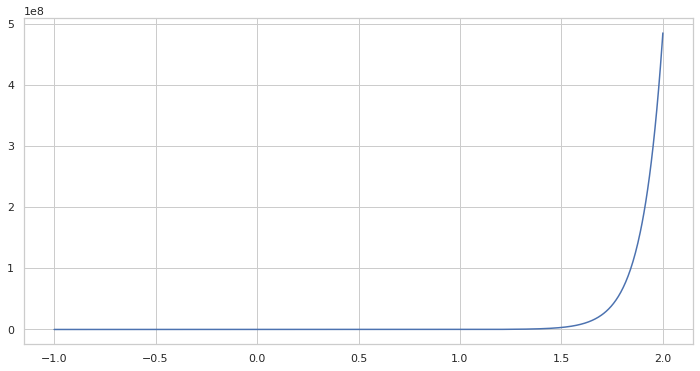

In [152]:
N = 1000
const = 10
x = np.linspace(-1, 2, N)
# y = np.minimum(1,np.exp(const*x))
y=np.exp(const*x)

plt.figure()
plt.plot(x, y)

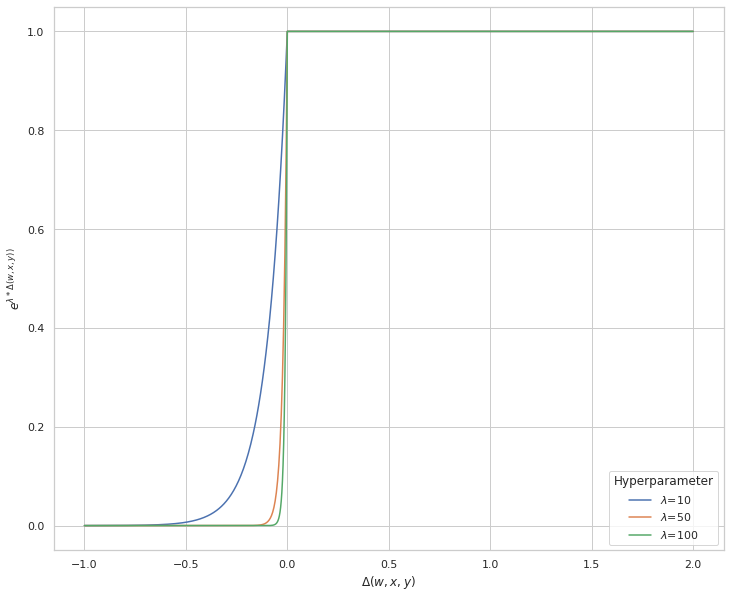

In [144]:
f, ax = plt.subplots(figsize=(12, 10))

# scaling function
N = 1000
x = np.linspace(-1, 2, N)
a = np.minimum(1,np.exp(10*x))
b = np.minimum(1,np.exp(50*x))
c = np.minimum(1,np.exp(100*x))

# plots
sns.lineplot(x=x,y=a, palette=my_palette, label=r'$\lambda$=10')
sns.lineplot(x=x,y=b, palette=my_palette, label=r'$\lambda$=50')
sns.lineplot(x=x,y=c, palette=my_palette, label=r'$\lambda$=100')

# labels
plt.legend(loc='lower right', title='Hyperparameter')
plt.xlabel(r'$\Delta(w,x,y)$')
plt.ylabel(r'$e^{\lambda*\Delta(w,x,y))}$')

# Scaling function with zoom effect
### Reference: https://gist.github.com/rizman18/ed0f3f05ed28504b9bda620edda11665#file-zoom_effect_matplotlib2-py

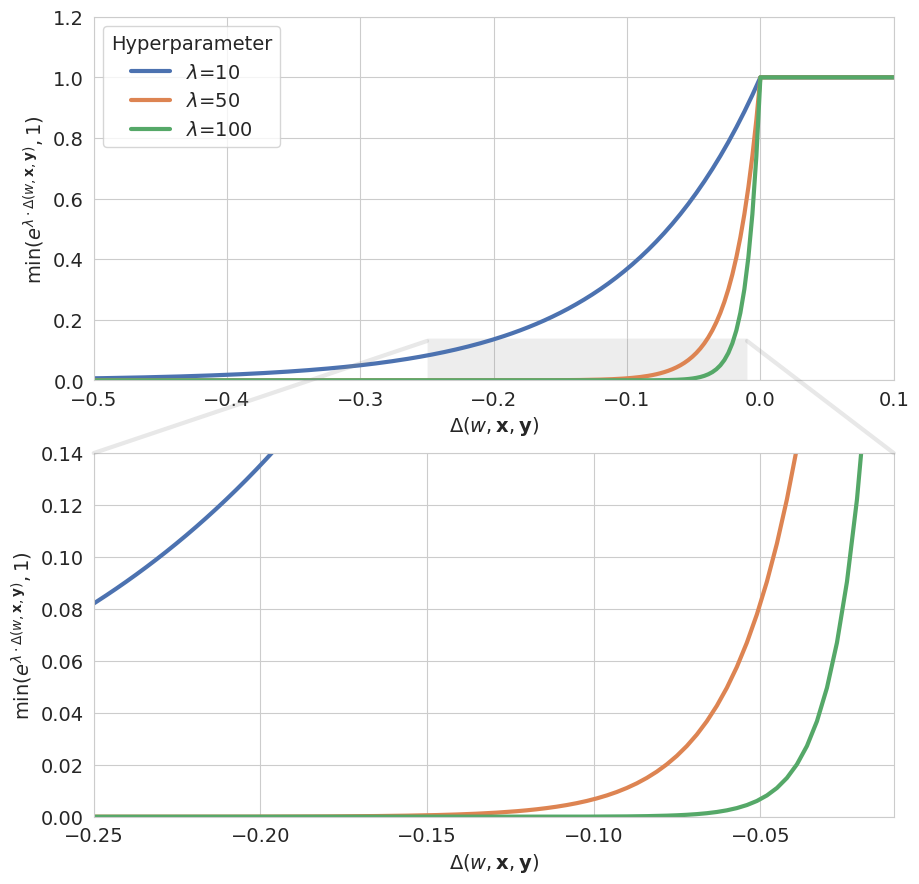

In [7]:
# reset to default matplotlib style 
plt.style.use('default')
# set color palette
color="deep"
sns.set_palette(color)
sns.set_style("whitegrid")
# plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rc('font', **{'size': 14})
thickness=3

# Define scaling function
N = 1000
x = np.linspace(-1, 2, N)
a = np.minimum(1,np.exp(10*x))
b = np.minimum(1,np.exp(50*x))
c = np.minimum(1,np.exp(100*x))

# Create main container
fig = plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

# Zoomed plot
# Create first axes, the top-left plot with green plot
# x axis limits
left = -0.25
right = -0.01
top = 0.14
bottom = 0

sub1 = fig.add_subplot(2,1,2) # two rows, one column, first cell
sub1.plot(x, a, color = 'C0', linewidth=thickness)
sub1.plot(x, b, color = 'C1', linewidth=thickness)
sub1.plot(x, c, color = 'C2', linewidth=thickness)
sub1.set_xlim(left, right)
sub1.set_ylim(bottom, top)

# Full plot
# Create third axes, a combination of third and fourth cell
sub3 = fig.add_subplot(2,1,1) # two rows, one colums, second cell
sub3.plot(x, a, color = 'C0', label=r'$\lambda$=10', linewidth=thickness)
sub3.plot(x, b, color = 'C1', label=r'$\lambda$=50', linewidth=thickness)
sub3.plot(x, c, color = 'C2', label=r'$\lambda$=100', linewidth=thickness)
sub3.set_xlim(-0.5, 0.1)
sub3.set_ylim(0, 1.2)


# Create blocked area in third axes
sub3.fill_between((left,right), 0, top, facecolor='C7', alpha=0.15) # blocked area for first axes

# Create left side of Connection patch for first axes
con1 = ConnectionPatch(xyA=(left, top), coordsA=sub1.transData, 
                       xyB=(left, top-0.01), coordsB=sub3.transData, color = 'C7', alpha=0.2,
                       linewidth=thickness)
# Add left side to the figure
fig.add_artist(con1)

# Create right side of Connection patch for first axes
con2 = ConnectionPatch(xyA=(right, top), coordsA=sub1.transData, 
                       xyB=(right, top-0.01), coordsB=sub3.transData, color = 'C7', alpha=0.2,
                       linewidth=thickness)
# Add right side to the figure
fig.add_artist(con2)

# # grid
# fig.grid(color = 'C7', alpha=0.5, linestyle='-', linewidth=1)

# legend
plt.legend(loc='upper left', title='Hyperparameter')

# labels
sub3.set_xlabel(r'$\Delta\left(w,\mathbf{x},\mathbf{y}\right)$')
sub3.set_ylabel(r'$\min\left(e^{\lambda\cdot\Delta\left(w,\mathbf{x},\mathbf{y}\right)},1\right)$')
sub1.set_xlabel(r'$\Delta\left(w,\mathbf{x},\mathbf{y}\right)$')
sub1.set_ylabel(r'$\min\left(e^{\lambda\cdot\Delta\left(w,\mathbf{x},\mathbf{y}\right)},1\right)$')

# export
plt.savefig('seaborn_plots/sdb_scaling.png', dpi = 500, bbox_inches = 'tight')

# Unused figures

# Stereotype raw score

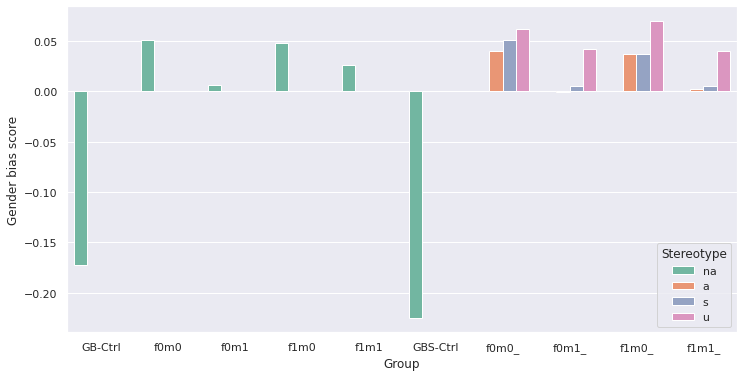

In [45]:
sns.barplot(x = "Group", y = "Gender bias score", hue = "Stereotype", data = data)
plt.show()

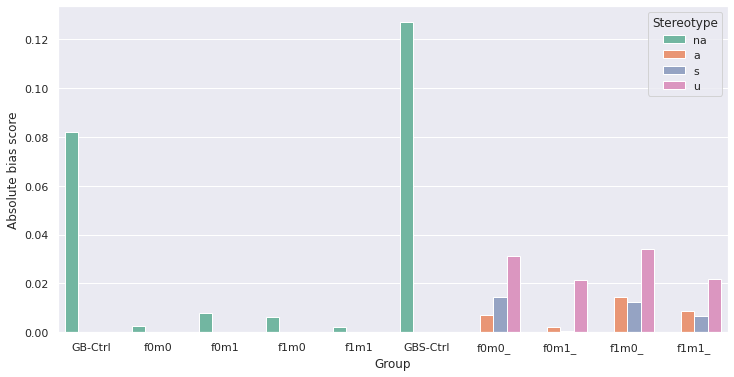

In [47]:
sns.barplot(x = "Group", y = "Absolute bias score", hue = "Stereotype", data = data)
plt.show()

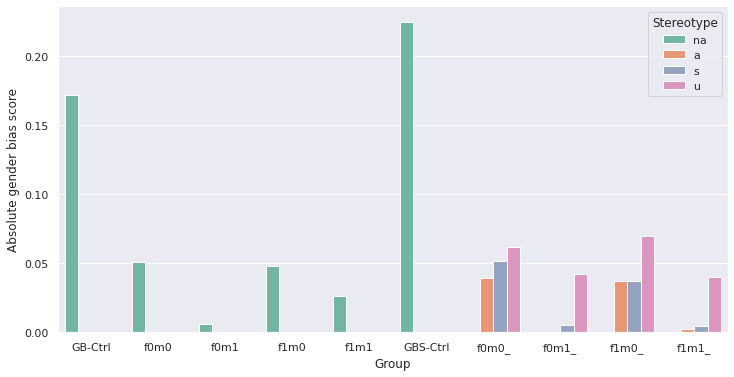

In [46]:
sns.barplot(x = "Group", y = "Absolute gender bias score", hue = "Stereotype", data = data)
plt.show()

# Stereotype % positive vs negative score

In [47]:
data = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/bias_score2.xlsx')

In [48]:
data

,Row #,Method,Stereotype,% +ve Bias score,% -ve Bias score,delta bias score,% +ve Gender bias score,% -ve Gender bias score,delta gender bias score
0,1,GB-Ctrl,none,0.445521,0.554479,-0.108959,0.333333,0.666667,-0.333333
1,2,f0m0,none,0.477218,0.522782,-0.045564,0.508772,0.491228,0.017544
2,3,f0m1,none,0.474699,0.525301,-0.050602,0.428571,0.571429,-0.142857
3,4,f1m0,none,0.505995,0.494005,0.011990,0.491228,0.508772,-0.017544
4,5,f1m1,none,0.505995,0.494005,0.011990,0.438596,0.561404,-0.122807
5,6,GBS-Ctrl,none,0.428230,0.571770,-0.143541,0.344828,0.655172,-0.310345
6,7,f0m0_,a,0.483333,0.516667,-0.033333,0.465517,0.534483,-0.068966
7,8,f0m0_,s,0.509524,0.490476,0.019048,0.482759,0.517241,-0.034483
8,9,f0m0_,u,0.520384,0.479616,0.040767,0.473684,0.526316,-0.052632
9,10,f0m1_,a,0.490476,0.509524,-0.019048,0.379310,0.620690,-0.241379


In [67]:
my_palette=['C9','C0','C1','C7']

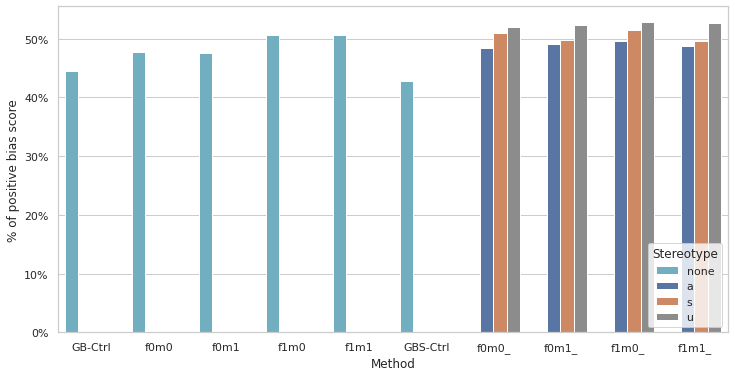

In [68]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Method", y="% +ve Bias score", hue="Stereotype", palette=my_palette, data=data)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='lower right', title='Stereotype')
plt.ylabel("% of positive bias score")
plt.show()

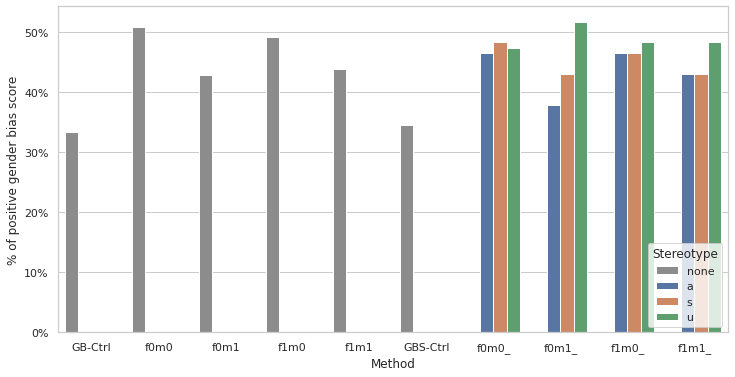

In [51]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="Method", y="% +ve Gender bias score", hue="Stereotype", palette=my_palette, data=data)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='lower right', title='Stereotype')
plt.ylabel("% of positive gender bias score")
plt.show()

# GB-Ctrl fixed incorrect token

In [13]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GBS-convai2-norm (2)')
df = df.set_index('Unnamed: 0')
df

,f0m0u,f1m0u,f0m1u,f1m1u
Unnamed: 0,,,,
f0m0u,0.545084,0.454916,0.000000,0.000000
f1m0u,0.000000,0.460177,0.539823,0.000000
f0m1u,0.000000,0.000000,0.487179,0.512821
f1m1u,0.333333,0.000000,0.000000,0.666667


Text(51.0, 0.5, 'True token')

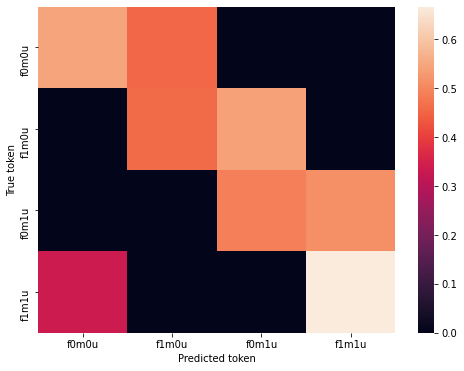

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df)
plt.xlabel("Predicted token")
plt.ylabel("True token")

# GBS-Ctrl fixed incorrect

In [2]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GBS-convai2')
df = df.set_index('Unnamed: 0')
df

,f0m0a,f0m0s,f0m0u,f0m1a,f0m1s,f0m1u,f1m0a,f1m0s,f1m0u,f1m1a,f1m1s,f1m1u
Unnamed: 0,,,,,,,,,,,,
f0m0a,0,0,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
f0m0s,0,0,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
f0m0u,0,0,0.545084,0,0,0.000000,0,0,0.454916,0,0,0.000000
f0m1a,0,0,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
f0m1s,0,0,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
f0m1u,0,0,0.000000,0,0,0.487179,0,0,0.000000,0,0,0.512821
f1m0a,0,0,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
f1m0s,0,0,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
f1m0u,0,0,0.000000,0,0,0.539823,0,0,0.460177,0,0,0.000000


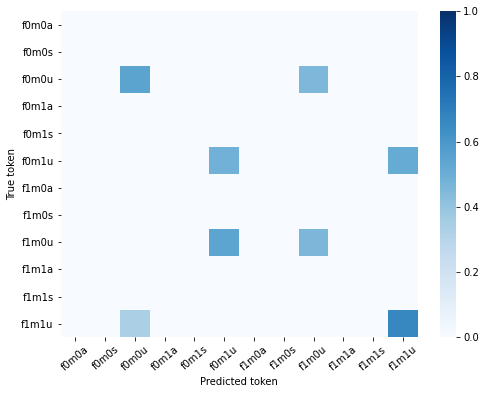

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df, vmax=1, cmap='Blues')
plt.xlabel("Predicted token")
plt.ylabel("True token")
plt.xticks(rotation=40)
plt.savefig('seaborn_plots/GBS-Ctrl-incorrect-convai2', dpi=500, facecolor='w', edgecolor='w',
        orientation='landscape', format=None, pad_inches=0,
        transparent=False, bbox_inches='tight')

## Stereoset maximum likelihood

In [5]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GBS-stereoset')
df = df.set_index('Unnamed: 0')
df

,f0m0a,f0m0s,f0m0u,f0m1a,f0m1s,f0m1u,f1m0a,f1m0s,f1m0u,f1m1a,f1m1s,f1m1u
Unnamed: 0,,,,,,,,,,,,
f0m0a,19,15,14,10,18,17,17,16,16,17,15,21
f0m0s,22,20,12,16,22,11,17,19,20,12,19,14
f0m0u,35,34,31,36,29,21,39,36,31,35,36,28
f0m1a,18,8,9,13,8,9,10,4,16,12,8,12
f0m1s,13,12,16,10,13,8,17,13,14,8,7,15
f0m1u,0,1,0,3,5,1,2,0,1,0,1,2
f1m0a,12,4,3,7,4,7,8,9,10,12,5,10
f1m0s,5,2,4,7,4,6,0,11,2,10,6,4
f1m0u,1,1,0,3,0,1,3,2,0,2,1,2


Text(51.0, 0.5, 'True token')

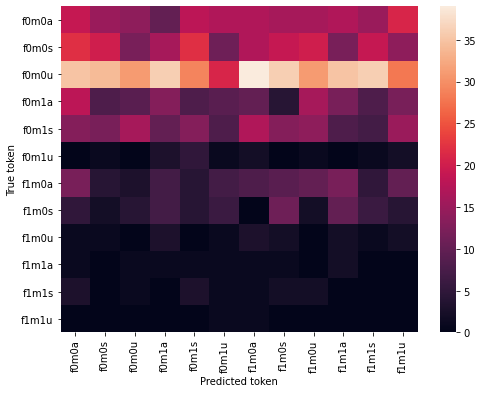

In [6]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df)
plt.xlabel("Predicted token")
plt.ylabel("True token")

In [2]:
df = pd.read_excel('/rds/project/rds-xyBFuSj0hm0/myl40/mphil_project/excel/confusion_matrix.xlsx', sheet_name='GBS-stereoset-norm')
df = df.set_index('Unnamed: 0')
df

,f0m0a,f0m0s,f0m0u,f0m1a,f0m1s,f0m1u,f1m0a,f1m0s,f1m0u,f1m1a,f1m1s,f1m1u
Unnamed: 0,,,,,,,,,,,,
f0m0a,0.097436,0.076923,0.071795,0.051282,0.092308,0.087179,0.087179,0.082051,0.082051,0.087179,0.076923,0.107692
f0m0s,0.107843,0.098039,0.058824,0.078431,0.107843,0.053922,0.083333,0.093137,0.098039,0.058824,0.093137,0.068627
f0m0u,0.089514,0.086957,0.079284,0.092072,0.074169,0.053708,0.099744,0.092072,0.079284,0.089514,0.092072,0.071611
f0m1a,0.141732,0.062992,0.070866,0.102362,0.062992,0.070866,0.078740,0.031496,0.125984,0.094488,0.062992,0.094488
f0m1s,0.089041,0.082192,0.109589,0.068493,0.089041,0.054795,0.116438,0.089041,0.095890,0.054795,0.047945,0.102740
f0m1u,0.000000,0.062500,0.000000,0.187500,0.312500,0.062500,0.125000,0.000000,0.062500,0.000000,0.062500,0.125000
f1m0a,0.131868,0.043956,0.032967,0.076923,0.043956,0.076923,0.087912,0.098901,0.109890,0.131868,0.054945,0.109890
f1m0s,0.081967,0.032787,0.065574,0.114754,0.065574,0.098361,0.000000,0.180328,0.032787,0.163934,0.098361,0.065574
f1m0u,0.062500,0.062500,0.000000,0.187500,0.000000,0.062500,0.187500,0.125000,0.000000,0.125000,0.062500,0.125000


Text(51.0, 0.5, 'True token')

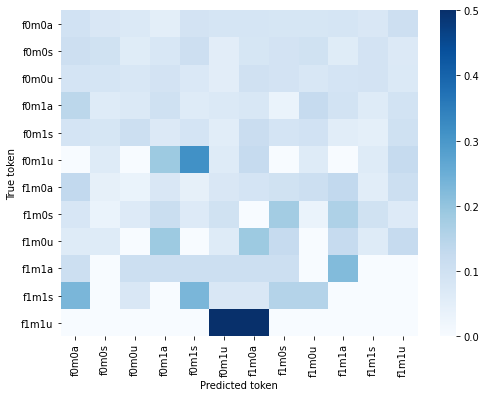

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df, cmap='Blues')
plt.xlabel("Predicted token")
plt.ylabel("True token")